In [380]:
#Nhóm 8
#K224141660 - Trần Bích Hà
#K224141662 - Nguyễn Lâm Xuân Hân
#K224141672 - Phan Ánh Linh (Nhóm trưởng)
#K224141679 - Trần Khánh Ngọc
#K224141689 - Trần Ngọc Như Quuỳnh

In [381]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import mode
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [382]:
url = 'https://drive.google.com/file/d/1U4ZIUbb_Qy1w9wbce6vMhjUFZD2IMCw3/view?usp=drive_link'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

# Đọc dữ liệu từ URL với encoding 'utf-8-sig'
df = pd.read_csv(url, encoding='latin1')
bank=df.copy()
bank.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5022428,F,N,Y,No children,90000.0,Secondary,Civil marriage,House / apartment,-16569,-517,1,0,0,0,Laborers,-38,2,1
1,5092251,M,Y,Y,No children,112500.0,Secondary / secondary special,Married,House / apartment,-17300,-1235,1,0,0,0,Drivers,-44,2,1
2,5029719,Female,Y,Y,1 children,265500.0,Higher education,Married,With parents,-10998,-2514,1,0,0,0,Accountants,-9,2,1
3,5115608,F,N,Y,No children,202500.0,Secondary / secondary special,Married,House / apartment,-14523,-3420,1,0,0,0,Core staff,-16,5,1
4,5018498,F,Y,Y,No children,90000.0,Secondary / secondary special,Married,House / apartment,-18950,-1002,1,1,1,0,Cooking staff,-35,5,1
5,5143179,M,Y,N,No children,225000.0,Secondary,Single,House / apartment,-17473,-2631,1,0,0,0,Managers,-7,3,1
6,5096527,F,N,N,No children,135000.0,Secondary / secondary special,Widow,Co-op apartment,-20012,-584,1,0,0,0,Core staff,-34,5,1
7,5126463,F,Y,N,No children,112500.0,Secondary / secondary special,Separated,House / apartment,-17641,-10454,1,1,1,0,Medicine staff,-22,2,1
8,5018501,F,Y,Y,No children,90000.0,Secondary / secondary special,Married,House / apartment,-18950,-1002,1,1,1,0,Cooking staff,-10,5,1
9,5085886,M,Y,Y,No children,315000.0,Higher education,Married,House / apartment,-18661,-1265,1,0,0,0,Managers,-27,5,1


In [383]:
#Xem xét dữ liệu chung nên không cần ID của khách hàng
bank.drop('ID', axis=1, inplace=True)
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          6000 non-null   object 
 1   FLAG_OWN_CAR         6000 non-null   object 
 2   FLAG_OWN_REALTY      6000 non-null   object 
 3   CNT_CHILDREN         6000 non-null   object 
 4   AMT_INCOME_TOTAL     6000 non-null   float64
 5   NAME_EDUCATION_TYPE  6000 non-null   object 
 6   NAME_FAMILY_STATUS   6000 non-null   object 
 7   NAME_HOUSING_TYPE    6000 non-null   object 
 8   DAYS_BIRTH           6000 non-null   int64  
 9   DAYS_EMPLOYED        6000 non-null   int64  
 10  FLAG_MOBIL           6000 non-null   int64  
 11  FLAG_WORK_PHONE      6000 non-null   int64  
 12  FLAG_PHONE           6000 non-null   int64  
 13  FLAG_EMAIL           6000 non-null   int64  
 14  JOB                  6000 non-null   object 
 15  BEGIN_MONTHS         6000 non-null   i

In [384]:
# TẠO DANH SÁCH CÁC TÍNH NĂNG ĐƯỢC PHÂN LOẠI HOẶC SỐ
Object_Type = bank.select_dtypes(include=['object']).columns.tolist()
Num_Type = bank.select_dtypes(include=['float','int']).columns.tolist()

print('Categorical list:', Object_Type)
print('Numerical list :', Num_Type)


Categorical list: ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'JOB', 'STATUS']
Numerical list : ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'BEGIN_MONTHS', 'TARGET']


In [385]:
#Quan sát một số biến khác
bank.groupby('CODE_GENDER').size()

CODE_GENDER
F         3463
Female       2
M         2535
dtype: int64

In [386]:
#Xuất hiện lỗi Female, F, M. Đồng bộ "Female" thành "F"
bank['CODE_GENDER'] = bank['CODE_GENDER'].str.replace('Female', 'F')

# In kết quả
bank.groupby('CODE_GENDER').size()

CODE_GENDER
F    3465
M    2535
dtype: int64

In [387]:
#Thay đổi dấu "-" trong số ngày làm việc DAYS_EMPLOYED, tuổi tính theo ngày DAYS_BIRTH
#,số tháng trước trích xuất dữ liệu Khách hàng BEGIN_MONTHS
bank['DAYS_BIRTH'] = bank['DAYS_BIRTH'].apply(lambda x: abs(x) if x < 0 else x)
bank['DAYS_EMPLOYED'] = bank['DAYS_EMPLOYED'].apply(lambda x: abs(x) if x < 0 else x)
bank['CUSTOMER_MONTHS'] = bank['BEGIN_MONTHS'].apply(lambda x: abs(x) if x < 0 else x)

In [388]:
# Tạo cột tuổi theo năm để sẽ phân tích hơn
bank['YEARS_BIRTH'] = bank['DAYS_BIRTH'].apply(lambda x: (x // 365))
bank['YEARS_BIRTH']

0       45
1       47
2       30
3       39
4       51
        ..
5995    50
5996    54
5997    48
5998    38
5999    55
Name: YEARS_BIRTH, Length: 6000, dtype: int64

In [389]:
# Tạo cột thời gian làm việc theo năm để sẽ phân tích hơn
bank['YEARS_EMPLOYED'] = bank['DAYS_EMPLOYED'].apply(lambda x: (x // 365))
bank['YEARS_EMPLOYED']

0        1
1        3
2        6
3        9
4        2
        ..
5995    27
5996    33
5997     5
5998     4
5999    11
Name: YEARS_EMPLOYED, Length: 6000, dtype: int64

In [390]:
#Có thể drop BEGIN_MONTHS, DAYS_EMPLOYED và DAYS_BIRTH đi 
bank.drop('DAYS_BIRTH', axis=1, inplace=True)
bank.drop('DAYS_EMPLOYED', axis=1, inplace=True)
bank.drop('BEGIN_MONTHS', axis=1, inplace=True)

In [391]:
bank.groupby('NAME_EDUCATION_TYPE').size()

NAME_EDUCATION_TYPE
Academic degree                     7
Higher education                 1793
Incomplete higher                 241
Lower secondary                    84
Secondary                           2
Secondary / secondary special    3873
dtype: int64

In [392]:
#Xuất hiện lỗi Secondary, Secondary / secondary special. Đồng bộ để gọi chung "Secondary / secondary special" là "Secondary"
bank['NAME_EDUCATION_TYPE'] = bank['NAME_EDUCATION_TYPE'].str.replace('Secondary / secondary special', 'Secondary')

# In kết quả
bank.groupby('NAME_EDUCATION_TYPE').size()

NAME_EDUCATION_TYPE
Academic degree         7
Higher education     1793
Incomplete higher     241
Lower secondary        84
Secondary            3875
dtype: int64

In [393]:
bank.groupby('NAME_HOUSING_TYPE').size()

NAME_HOUSING_TYPE
Co-op apartment          60
House / apartment      5259
Municipal apartment     208
Office apartment         64
Rented apartment         89
With parents            320
dtype: int64

In [394]:
#Đồng bộ các loại Co-op apartment, House / apartment, Municipal apartment, Municipal apartment, Office apartment thành "Own"
bank['NAME_HOUSING_TYPE'] = bank['NAME_HOUSING_TYPE'].str.replace('Co-op apartment', 'Own')
bank['NAME_HOUSING_TYPE'] = bank['NAME_HOUSING_TYPE'].str.replace('House / apartment', 'Own')
bank['NAME_HOUSING_TYPE'] = bank['NAME_HOUSING_TYPE'].str.replace('Municipal apartment', 'Own')
bank['NAME_HOUSING_TYPE'] = bank['NAME_HOUSING_TYPE'].str.replace('Office apartment', 'Own')

#Rented apartment là khách hàng đi thuê nhà ở. Sửa thành "Rented"
bank['NAME_HOUSING_TYPE'] = bank['NAME_HOUSING_TYPE'].str.replace('Rented apartment', 'Rented')

# In kết quả
bank.groupby('NAME_HOUSING_TYPE').size()

NAME_HOUSING_TYPE
Own             5591
Rented            89
With parents     320
dtype: int64

In [395]:
bank.groupby('NAME_FAMILY_STATUS').size()

NAME_FAMILY_STATUS
Civil marriage           433
Married                 4193
Separated                324
Single                     1
Single / not married     882
Widow                    167
dtype: int64

In [396]:
#Civil marriage là kết hôn không tổ chức nghi lễ tôn giáo
#Married là kết hôn và có tổ chức nghi lễ tôn giáo ( Đạo Thiên chúa)
#Nhìn chung vẫn gọi cả hai trong tình trạng hôn nhân là kết hôn (married)
#Vì thế gộp chung cả 2 thành "married"
bank['NAME_FAMILY_STATUS'] = bank['NAME_FAMILY_STATUS'].str.replace('Civil marriage', 'Married')

#Xuất hiện lỗi Single, Single / not married. Đồng bộ để gọi chung là "Single"
bank['NAME_FAMILY_STATUS'] = bank['NAME_FAMILY_STATUS'].str.replace('Single / not married', 'Single')

# In kết quả
bank.groupby('NAME_FAMILY_STATUS').size()

NAME_FAMILY_STATUS
Married      4626
Separated     324
Single        883
Widow         167
dtype: int64

In [397]:
bank.groupby('STATUS').size()

STATUS
0    1531
1      52
2     542
3     181
4     152
5    1087
C    1666
X     789
dtype: int64

In [398]:
#Thay thế X: Không có nợ trong tháng này, C: Đã thanh toán hết nợ trong tháng này thành 0
#Vì những người thuộc nhóm 0 thường là nhóm người không có rủi ro
bank.STATUS.replace('X', 0, inplace=True)
bank.STATUS.replace('C', 0, inplace=True)
bank.STATUS = bank.STATUS.astype('int')
bank.groupby('STATUS').size()

STATUS
0    3986
1      52
2     542
3     181
4     152
5    1087
dtype: int64

In [399]:
bank_copy= bank.copy()

In [400]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
AMT_INCOME_TOTAL,6000.0,198630.028500,106361.062954,31500.0,130500.0,180000.0,234000.0,1575000.0
FLAG_MOBIL,6000.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,6000.0,0.294167,0.455705,0.0,0.0,0.0,1.0,1.0
FLAG_PHONE,6000.0,0.327667,0.469402,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,6000.0,0.100000,0.300025,0.0,0.0,0.0,0.0,1.0
STATUS,6000.0,1.287000,1.979971,0.0,0.0,0.0,2.0,5.0
TARGET,6000.0,0.327000,0.469156,0.0,0.0,0.0,1.0,1.0
CUSTOMER_MONTHS,6000.0,19.580167,14.062214,0.0,8.0,17.0,30.0,60.0
YEARS_BIRTH,6000.0,40.950833,9.366841,22.0,33.0,41.0,49.0,66.0
YEARS_EMPLOYED,6000.0,6.310500,6.239517,0.0,2.0,4.0,9.0,42.0


In [401]:
# Xem xét AMT_INCOME_TOTAL
income = bank['AMT_INCOME_TOTAL']

<Axes: xlabel='AMT_INCOME_TOTAL'>

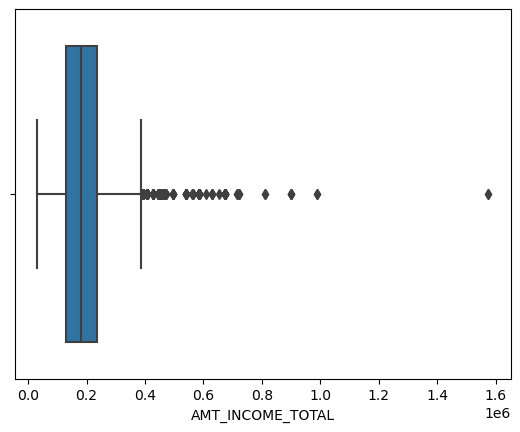

In [402]:
sns.boxplot(x = income)
#Có Outlier

<Axes: xlabel='AMT_INCOME_TOTAL'>

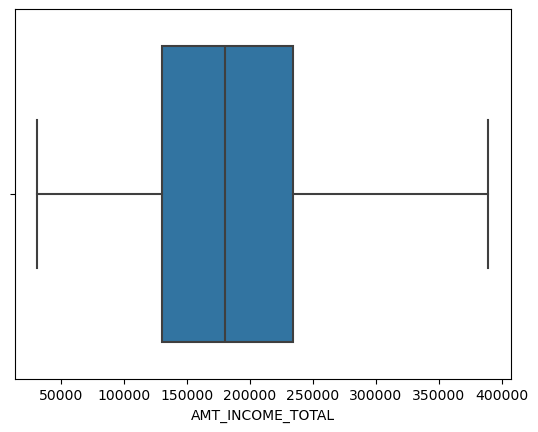

In [403]:
#Làm sạch Outlier (Thay vì bỏ đi thì thay thế bằng giá trị upper)
Q1 = income.quantile(0.25)
Q3 = income.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outlier = (income < lower) | (income > upper)
income[outlier]
income[outlier] = upper
sns.boxplot(x = income)

In [404]:
# Xem xét YEARS_EMPLOYED
employment = bank['YEARS_EMPLOYED']

<Axes: xlabel='YEARS_EMPLOYED'>

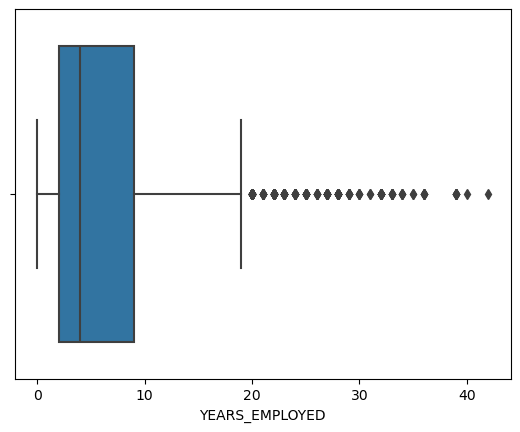

In [405]:
sns.boxplot(x = employment)
#Có Outlier

<Axes: xlabel='YEARS_EMPLOYED'>

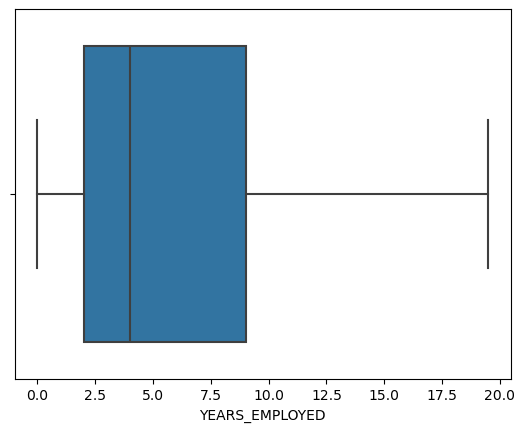

In [406]:
#Làm sạch Outlier
Q1 = employment.quantile(0.25)
Q3 = employment.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outlier = (employment < lower) | (employment > upper)
employment[outlier]
employment[outlier] = upper
sns.boxplot(x = employment)

In [407]:
# Xem xét CUSTOMER_MONTHS
customer_months = bank['CUSTOMER_MONTHS']

<Axes: xlabel='CUSTOMER_MONTHS'>

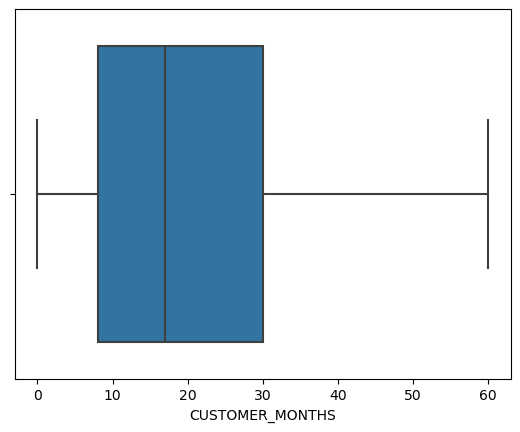

In [408]:
sns.boxplot(x = customer_months)
#Không có Outlier

In [409]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
AMT_INCOME_TOTAL,6000.0,192419.004000,84927.549079,31500.0,130500.0,180000.0,234000.0,389250.0
FLAG_MOBIL,6000.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,6000.0,0.294167,0.455705,0.0,0.0,0.0,1.0,1.0
FLAG_PHONE,6000.0,0.327667,0.469402,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,6000.0,0.100000,0.300025,0.0,0.0,0.0,0.0,1.0
STATUS,6000.0,1.287000,1.979971,0.0,0.0,0.0,2.0,5.0
TARGET,6000.0,0.327000,0.469156,0.0,0.0,0.0,1.0,1.0
CUSTOMER_MONTHS,6000.0,19.580167,14.062214,0.0,8.0,17.0,30.0,60.0
YEARS_BIRTH,6000.0,40.950833,9.366841,22.0,33.0,41.0,49.0,66.0
YEARS_EMPLOYED,6000.0,6.028250,5.348163,0.0,2.0,4.0,9.0,19.5


In [410]:
new_bank_str = bank_copy.select_dtypes(include = ['object'])
new_bank_str.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,JOB
0,F,N,Y,No children,Secondary,Married,Own,Laborers
1,M,Y,Y,No children,Secondary,Married,Own,Drivers
2,F,Y,Y,1 children,Higher education,Married,With parents,Accountants
3,F,N,Y,No children,Secondary,Married,Own,Core staff
4,F,Y,Y,No children,Secondary,Married,Own,Cooking staff


In [411]:
new_bank_int = bank_copy.select_dtypes(include = ['float','int'])
new_bank_int.head()

,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,STATUS,TARGET,CUSTOMER_MONTHS,YEARS_BIRTH,YEARS_EMPLOYED
0,90000.0,1,0,0,0,2,1,38,45,1
1,112500.0,1,0,0,0,2,1,44,47,3
2,265500.0,1,0,0,0,2,1,9,30,6
3,202500.0,1,0,0,0,5,1,16,39,9
4,90000.0,1,1,1,0,5,1,35,51,2


In [412]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
clf.fit_predict(new_bank_int)

array([ 1,  1, -1, ...,  1,  1, -1])

In [413]:
new_bank_int_scores = clf.negative_outlier_factor_
new_bank_int_scores[1:10]

array([  -1.01680976, -177.25378951,   -1.11791146,   -0.97288543,
         -0.9866433 ,   -0.98680471,   -1.05475123,   -0.96835716,
         -0.99629383])

In [414]:
np.sort(new_bank_int_scores)[0:50]

array([-6158.38716841, -6134.21715704, -3105.85992387, -3003.64041115,
       -2828.09541201, -2823.63920367, -2374.29633529, -2291.06415832,
       -2211.21332829, -2210.02351092, -2195.23245112, -2195.23244929,
       -2125.93260481, -1819.73319749, -1816.09852693, -1771.90639567,
       -1456.51731172,  -921.76274038,  -921.76273904,  -917.80413392,
        -875.90660716,  -875.08223915,  -860.784147  ,  -860.78414164,
        -857.67391571,  -816.9605648 ,  -740.37011774,  -727.86839555,
        -718.24951973,  -702.6327911 ,  -698.1970003 ,  -678.49201532,
        -658.84981642,  -648.05349763,  -633.00955705,  -631.77857089,
        -621.53843187,  -578.91968536,  -568.86283068,  -568.47120998,
        -555.41627654,  -555.13101984,  -550.80703628,  -549.2025141 ,
        -540.80614835,  -528.44624459,  -525.0297456 ,  -520.87853018,
        -517.93999794,  -517.93999273])

In [415]:
threshold_value = np.sort(new_bank_int_scores)[33]
multi_out_tf = new_bank_int_scores > threshold_value
multi_out_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [416]:
#Deletion Method
#non-outlier values
new_bank2 = new_bank_int[new_bank_int_scores > threshold_value]
new_bank2

,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,STATUS,TARGET,CUSTOMER_MONTHS,YEARS_BIRTH,YEARS_EMPLOYED
0,90000.0,1,0,0,0,2,1,38,45,1
1,112500.0,1,0,0,0,2,1,44,47,3
2,265500.0,1,0,0,0,2,1,9,30,6
3,202500.0,1,0,0,0,5,1,16,39,9
4,90000.0,1,1,1,0,5,1,35,51,2
...,...,...,...,...,...,...,...,...,...,...
5995,270000.0,1,0,0,0,0,0,16,50,27
5996,121500.0,1,0,0,0,0,0,24,54,33
5997,225000.0,1,0,0,0,0,0,13,48,5
5998,247500.0,1,0,0,0,0,0,25,38,4


In [417]:
suppression_value = new_bank_int[new_bank_int_scores == threshold_value]
multi_outliers = new_bank_int[~multi_out_tf]
res = multi_outliers.to_records(index = False)
res[:] = suppression_value.to_records(index = False)
res

rec.array([(324000., 1, 0, 0, 0, 0, 0, 11, 36, 13),
           (324000., 1, 0, 0, 0, 0, 0, 11, 36, 13),
           (324000., 1, 0, 0, 0, 0, 0, 11, 36, 13),
           (324000., 1, 0, 0, 0, 0, 0, 11, 36, 13),
           (324000., 1, 0, 0, 0, 0, 0, 11, 36, 13),
           (324000., 1, 0, 0, 0, 0, 0, 11, 36, 13),
           (324000., 1, 0, 0, 0, 0, 0, 11, 36, 13),
           (324000., 1, 0, 0, 0, 0, 0, 11, 36, 13),
           (324000., 1, 0, 0, 0, 0, 0, 11, 36, 13),
           (324000., 1, 0, 0, 0, 0, 0, 11, 36, 13),
           (324000., 1, 0, 0, 0, 0, 0, 11, 36, 13),
           (324000., 1, 0, 0, 0, 0, 0, 11, 36, 13),
           (324000., 1, 0, 0, 0, 0, 0, 11, 36, 13),
           (324000., 1, 0, 0, 0, 0, 0, 11, 36, 13),
           (324000., 1, 0, 0, 0, 0, 0, 11, 36, 13),
           (324000., 1, 0, 0, 0, 0, 0, 11, 36, 13),
           (324000., 1, 0, 0, 0, 0, 0, 11, 36, 13),
           (324000., 1, 0, 0, 0, 0, 0, 11, 36, 13),
           (324000., 1, 0, 0, 0, 0, 0, 11, 36, 13),
           (

In [418]:
new_bank_int[~multi_out_tf] = pd.DataFrame(res, index = new_bank_int[~multi_out_tf].index)
new_bank_int[~multi_out_tf]

,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,STATUS,TARGET,CUSTOMER_MONTHS,YEARS_BIRTH,YEARS_EMPLOYED
40,324000.0,1,0,0,0,0,0,11,36,13
1414,324000.0,1,0,0,0,0,0,11,36,13
1504,324000.0,1,0,0,0,0,0,11,36,13
1537,324000.0,1,0,0,0,0,0,11,36,13
1987,324000.0,1,0,0,0,0,0,11,36,13
1992,324000.0,1,0,0,0,0,0,11,36,13
2055,324000.0,1,0,0,0,0,0,11,36,13
2105,324000.0,1,0,0,0,0,0,11,36,13
2195,324000.0,1,0,0,0,0,0,11,36,13
2358,324000.0,1,0,0,0,0,0,11,36,13


In [419]:
new_bank_int.head()

,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,STATUS,TARGET,CUSTOMER_MONTHS,YEARS_BIRTH,YEARS_EMPLOYED
0,90000.0,1,0,0,0,2,1,38,45,1
1,112500.0,1,0,0,0,2,1,44,47,3
2,265500.0,1,0,0,0,2,1,9,30,6
3,202500.0,1,0,0,0,5,1,16,39,9
4,90000.0,1,1,1,0,5,1,35,51,2


In [420]:
data = pd.merge(new_bank_int, new_bank_str, left_index=True, right_index=True)
data

,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,STATUS,TARGET,CUSTOMER_MONTHS,YEARS_BIRTH,YEARS_EMPLOYED,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,JOB
0,90000.0,1,0,0,0,2,1,38,45,1,F,N,Y,No children,Secondary,Married,Own,Laborers
1,112500.0,1,0,0,0,2,1,44,47,3,M,Y,Y,No children,Secondary,Married,Own,Drivers
2,265500.0,1,0,0,0,2,1,9,30,6,F,Y,Y,1 children,Higher education,Married,With parents,Accountants
3,202500.0,1,0,0,0,5,1,16,39,9,F,N,Y,No children,Secondary,Married,Own,Core staff
4,90000.0,1,1,1,0,5,1,35,51,2,F,Y,Y,No children,Secondary,Married,Own,Cooking staff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,270000.0,1,0,0,0,0,0,16,50,27,F,N,Y,1 children,Higher education,Married,Own,Core staff
5996,121500.0,1,0,0,0,0,0,24,54,33,F,N,Y,No children,Secondary,Widow,Own,Laborers
5997,225000.0,1,0,0,0,0,0,13,48,5,M,N,N,1 children,Secondary,Married,With parents,Drivers
5998,247500.0,1,0,0,0,0,0,25,38,4,M,Y,N,No children,Secondary,Married,Own,Drivers


In [421]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AMT_INCOME_TOTAL,6000.0,196560.129000,97735.241605,31500.0,130500.0,180000.0,234000.0,675000.0
FLAG_MOBIL,6000.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,6000.0,0.291833,0.454644,0.0,0.0,0.0,1.0,1.0
FLAG_PHONE,6000.0,0.325500,0.468600,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,6000.0,0.099667,0.299580,0.0,0.0,0.0,0.0,1.0
STATUS,6000.0,1.285500,1.980230,0.0,0.0,0.0,2.0,5.0
TARGET,6000.0,0.326333,0.468910,0.0,0.0,0.0,1.0,1.0
CUSTOMER_MONTHS,6000.0,19.518833,14.041860,0.0,8.0,17.0,30.0,60.0
YEARS_BIRTH,6000.0,40.902500,9.324313,22.0,33.0,41.0,49.0,66.0
YEARS_EMPLOYED,6000.0,6.340833,6.250828,0.0,2.0,4.0,9.0,42.0


In [422]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,6000.0,5.083452e+06,42331.523146,5008806.0,5047662.00,5089433.0,5117527.50,5150464.0
AMT_INCOME_TOTAL,6000.0,1.986300e+05,106361.062954,31500.0,130500.00,180000.0,234000.00,1575000.0
DAYS_BIRTH,6000.0,-1.513583e+04,3413.467581,-24247.0,-17923.00,-15051.5,-12306.75,-8041.0
DAYS_EMPLOYED,6000.0,-2.486678e+03,2276.684802,-15661.0,-3377.75,-1800.0,-880.00,-65.0
FLAG_MOBIL,6000.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
FLAG_WORK_PHONE,6000.0,2.941667e-01,0.455705,0.0,0.00,0.0,1.00,1.0
FLAG_PHONE,6000.0,3.276667e-01,0.469402,0.0,0.00,0.0,1.00,1.0
FLAG_EMAIL,6000.0,1.000000e-01,0.300025,0.0,0.00,0.0,0.00,1.0
BEGIN_MONTHS,6000.0,-1.958017e+01,14.062214,-60.0,-30.00,-17.0,-8.00,0.0
TARGET,6000.0,3.270000e-01,0.469156,0.0,0.00,0.0,1.00,1.0


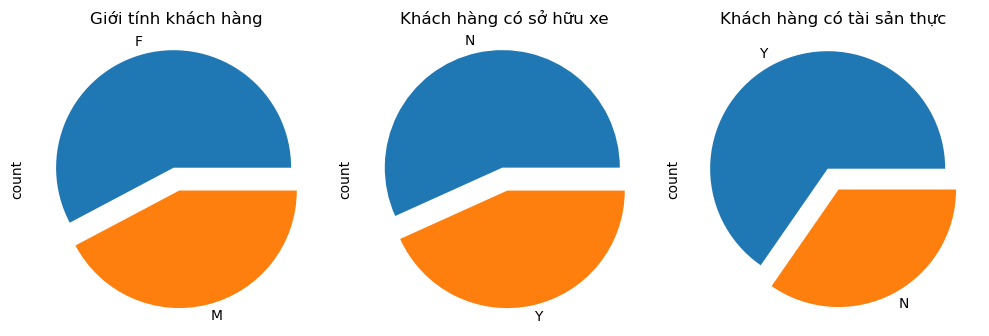

In [423]:
#Vẽ biểu đồ thống kê khách hàng theo Giới tính, sở hữu xe, sỏw hữu tài sản thực 	FLAG_OWN_CAR	FLAG_OWN_REALTY
fig, axes = plt.subplots(1,3)

g1= data['CODE_GENDER'].value_counts().plot.pie(explode=[0.1,0.1], ax=axes[0])
g1.set_title("Giới tính khách hàng")

g2= data['FLAG_OWN_CAR'].value_counts().plot.pie(explode=[0.1,0.1], ax=axes[1])
g2.set_title("Khách hàng có sở hữu xe")

g3= data['FLAG_OWN_REALTY'].value_counts().plot.pie(explode=[0.1,0.1], ax=axes[2])
g3.set_title("Khách hàng có tài sản thực")

fig.set_size_inches(10,5)

plt.tight_layout()

plt.show()

<Figure size 1000x1000 with 0 Axes>

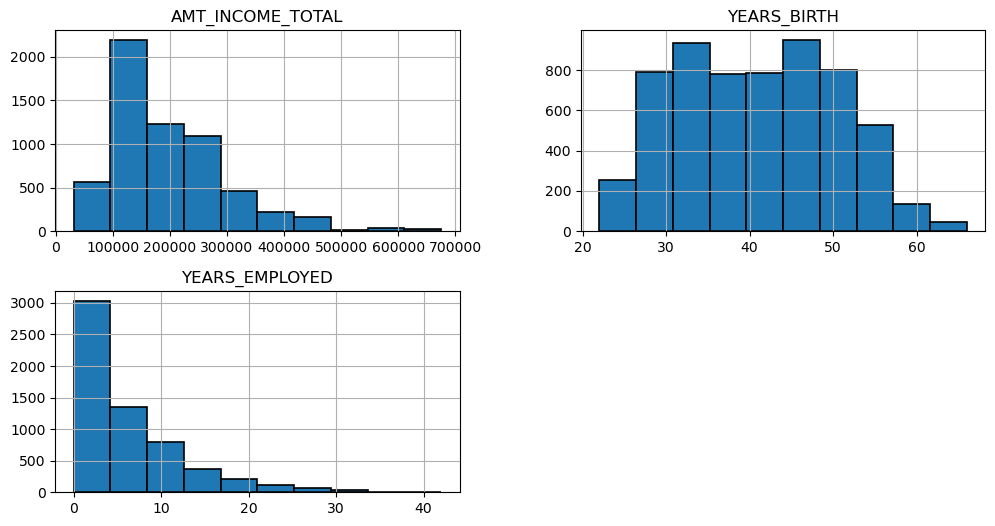

In [424]:
#Vẽ biểu đồ thống kê khách hàng theo Thu nhập, Tuổi, Thời gian làm việc
plt.figure(figsize=(10,10))
cols_to_plot = ["AMT_INCOME_TOTAL","YEARS_BIRTH","YEARS_EMPLOYED"]
data[cols_to_plot].hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
#Thu nhập của khách hàng chủ yếu nằm trong khoảng 100000USD
#Độ tuổi của khách hàng tập trung từ 25 tới 55
#Thời gian làm việc của khách hàng khá ngắn (từ 1 tới 5 năm). Tỉ lệ đổi việc cao.

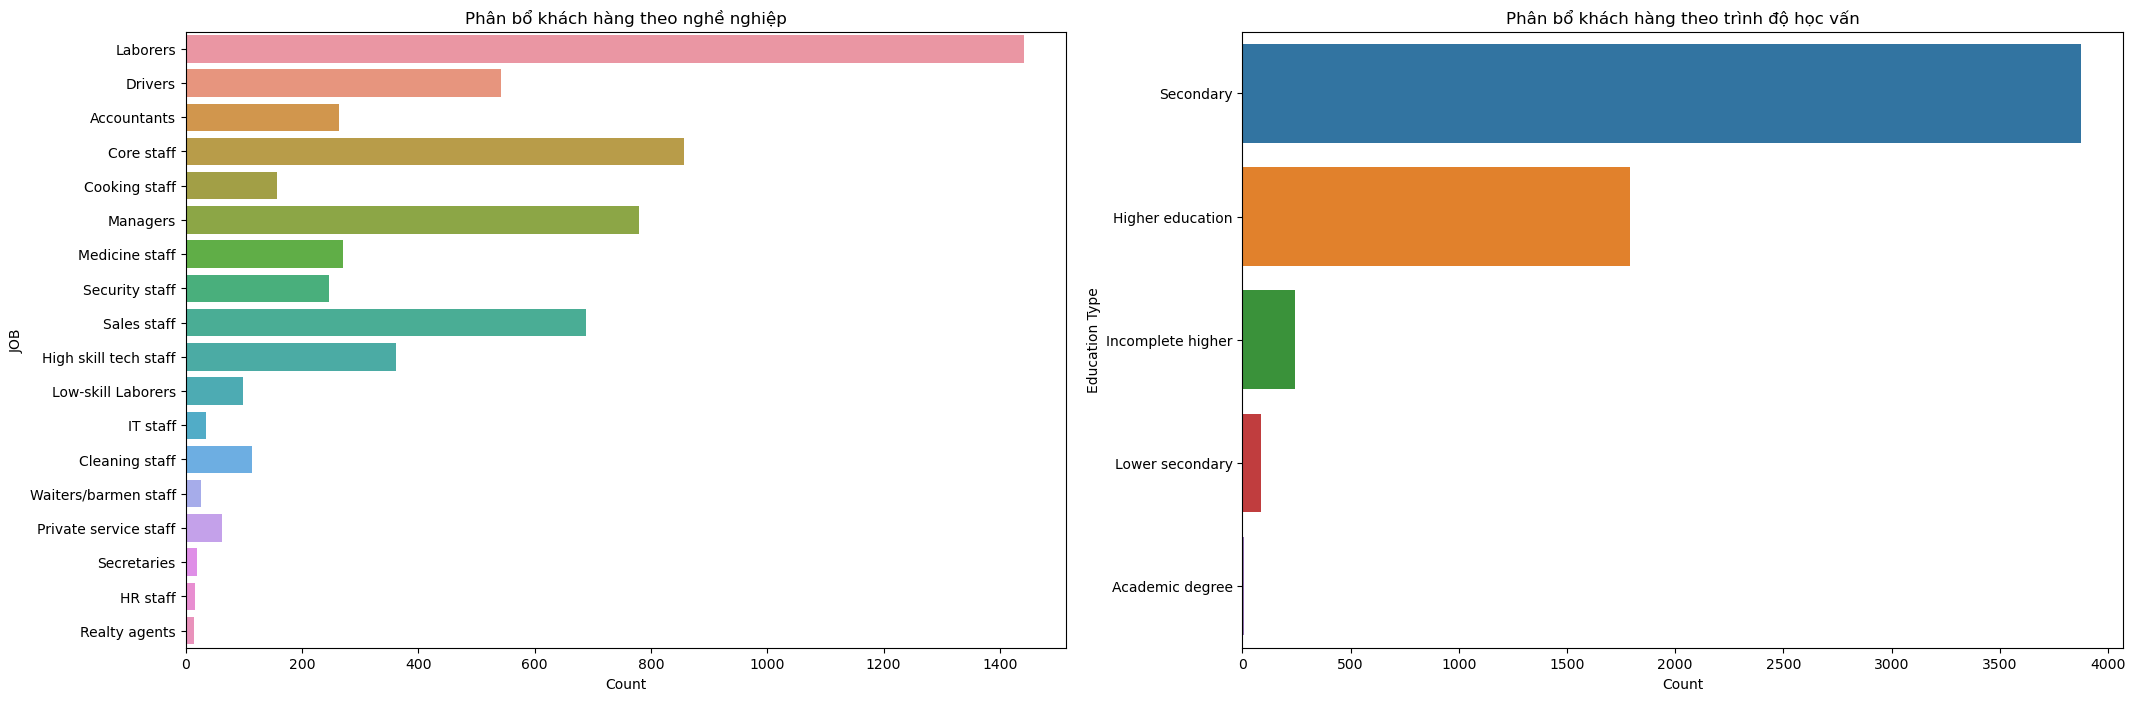

In [425]:
fig, axes = plt.subplots(1,2)
#Vẽ biểu đồ thống kê khách hàng theo Nghề nghiệp
g1=sns.countplot(y=data.JOB,linewidth=1.2, ax=axes[0])
g1.set_title("Phân bổ khách hàng theo nghề nghiệp")
g1.set_xlabel("Count")

g2= sns.countplot(y=data.NAME_EDUCATION_TYPE, ax=axes[1])
g2.set_title("Phân bổ khách hàng theo trình độ học vấn")
g2.set_xlabel("Count")
g2.set_ylabel("Education Type")

fig.set_size_inches(25,8)
plt.show()

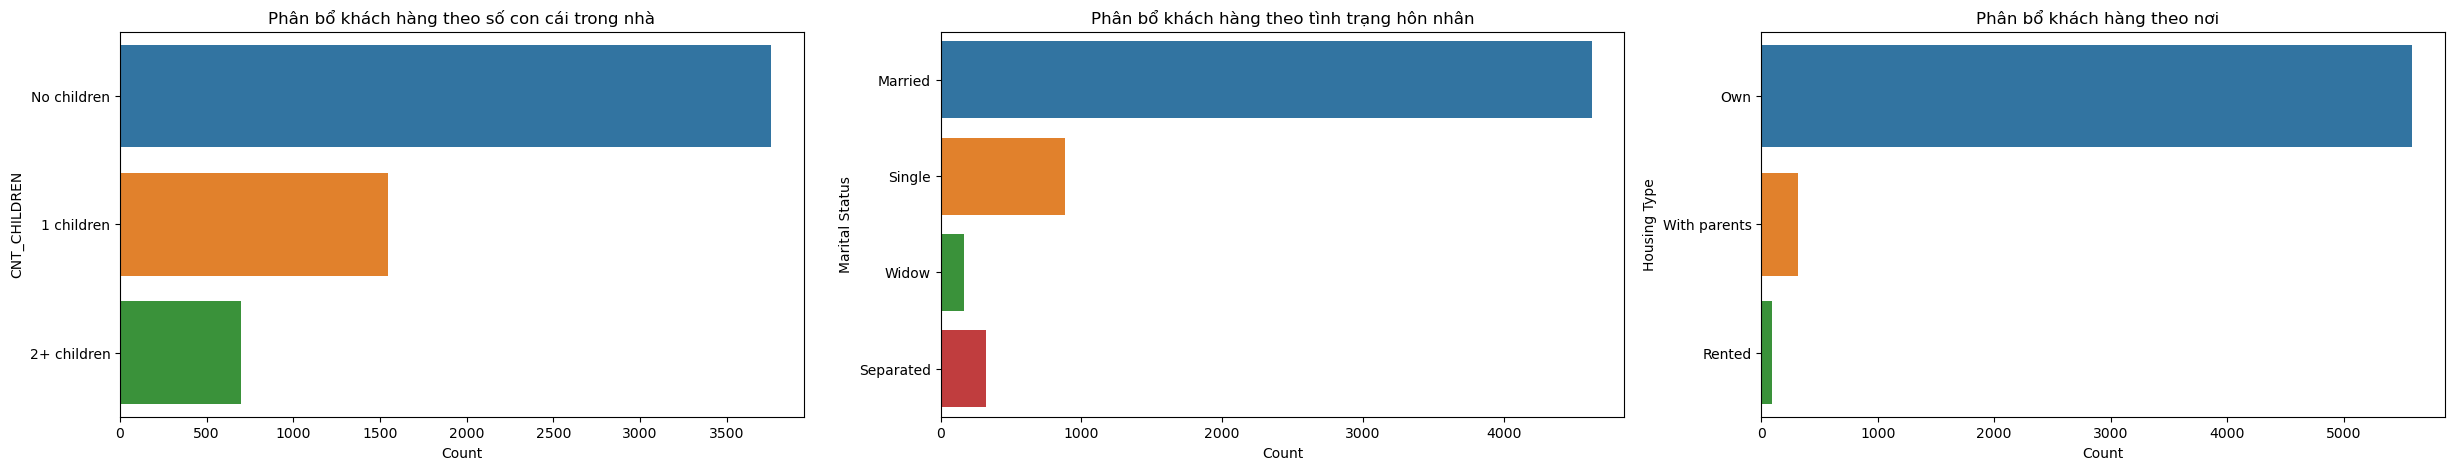

In [426]:
fig, axes = plt.subplots(1,3)
#Vẽ biểu đồ thống kê khách hàng theo Con cái
g3=sns.countplot(y=data.CNT_CHILDREN,linewidth=1.2, ax=axes[0])
g3.set_title("Phân bổ khách hàng theo số con cái trong nhà")
g3.set_xlabel("Count")

#Vẽ biểu đồ thống kê khách hàng theo Tình trang hôn nhân
g4=sns.countplot(y=data.NAME_FAMILY_STATUS,linewidth=1.2, ax=axes[1])
g4.set_title("Phân bổ khách hàng theo tình trạng hôn nhân")
g4.set_xlabel("Count")
g4.set_ylabel("Marital Status")

g5= sns.countplot(y=data.NAME_HOUSING_TYPE,linewidth=1.2, ax=axes[2])
g5.set_title("Phân bổ khách hàng theo nơi  ")
g5.set_xlabel("Count")
g5.set_ylabel("Housing Type")

fig.set_size_inches(30,5)
plt.show()

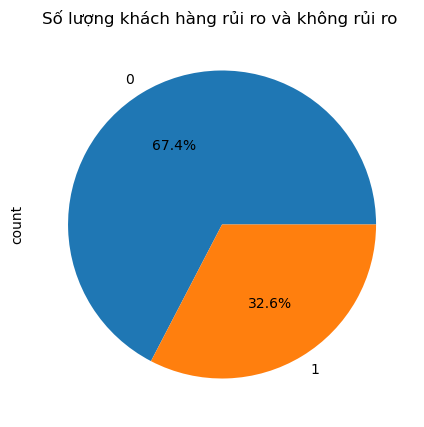

In [427]:
data['TARGET'].value_counts().plot(kind='pie',figsize=(10,5),autopct='%1.1f%%')
plt.title('Số lượng khách hàng rủi ro và không rủi ro ')
plt.show()
#Nhìn chung, số lượng người rủi ro chiếm phần không quá lớn (32,6%)
#Nhưng vẫn cần phải xem xét vì vẫn có thể đem đến thiệt hại lớn cho ngân hàng.

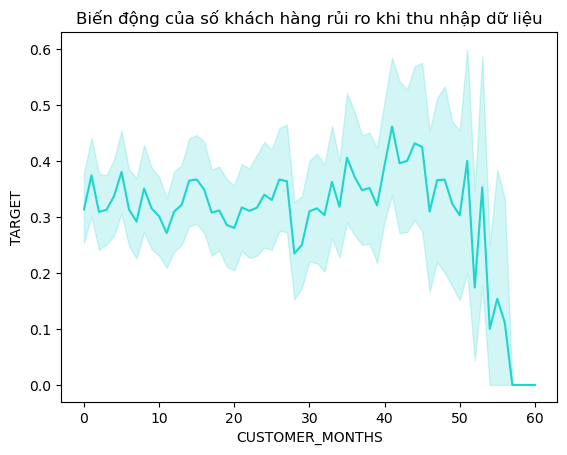

In [428]:
plt.title('Biến động của số khách hàng rủi ro khi thu nhập dữ liệu')
sns.lineplot(data=data,x='CUSTOMER_MONTHS',y='TARGET',color='#1CD6CE')
plt.show()

#Dữ liệu khách hàng khi thu nhập vào khonarg 40 tới 50 tháng trước chiếm tỉ lệ rủi ro cao

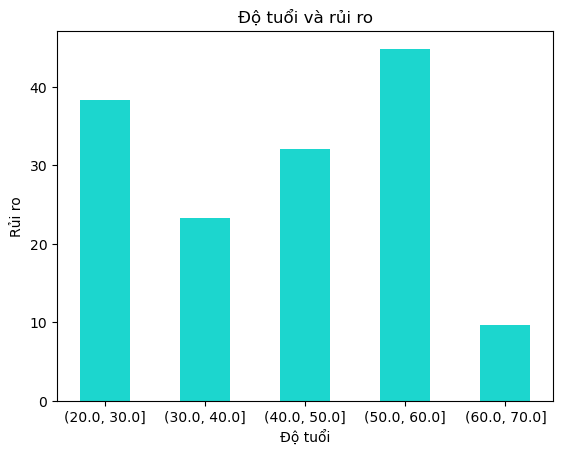

In [429]:
# Group clients into 6 age groups (20-30, 30-40, 40-50, 50-60, 60-70, >70)
conversionsAgeGroup = data.groupby(pd.cut(data['YEARS_BIRTH'], bins=[20, 30, 40, 50, 60, 70, float('inf')]))
summary = conversionsAgeGroup['YEARS_BIRTH'].count().reset_index(name='TotalCount')
summary['NumberConversions'] = conversionsAgeGroup['TARGET'].sum().values
summary['ConversionRate'] = summary['NumberConversions'] / summary['TotalCount'] * 100

# Rename the 6th group
summary['YEARS_BIRTH'] = summary['YEARS_BIRTH'].astype(str)
summary.loc[summary['YEARS_BIRTH'] == 'inf', 'ageGroup'] = '70+'

# Visualizing conversions
plt.bar(summary['YEARS_BIRTH'], summary['ConversionRate'], width=0.5, color='#1CD6CE')
plt.title('Độ tuổi và rủi ro')
plt.xlabel('Độ tuổi')
plt.ylabel('Rủi ro')
plt.show()
#Tỷ lệ rủi ro cao ở khách hàng có độ tuổi 50 - 60, sau đó là từ 20-30
#Có thể kết luận, khách hàng rủi ro thường nằm nhiều ở hai khoảng độ tuổi trên

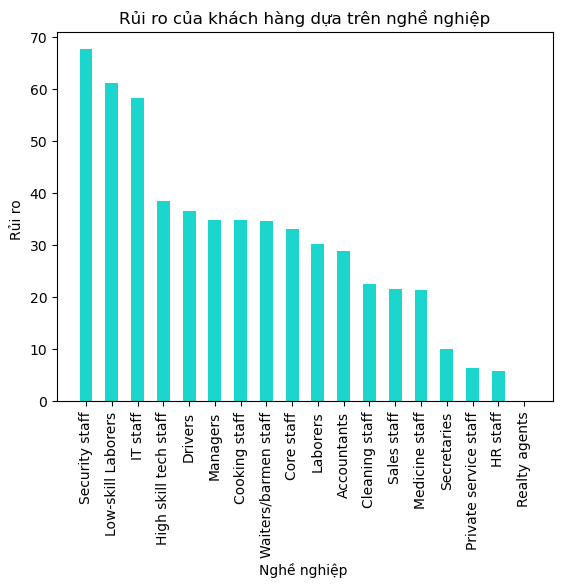

In [430]:
# Group the data
conversionsJob = data.groupby('JOB').agg(TotalCount=('JOB', 'count'), NumberConversions=('TARGET', 'sum')).reset_index()
conversionsJob['ConversionRate'] = conversionsJob['NumberConversions'] / conversionsJob['TotalCount'] * 100
conversionsJob = conversionsJob.sort_values('ConversionRate', ascending=False)

# Visualizing conversions
plt.bar(conversionsJob['JOB'], conversionsJob['ConversionRate'], width=0.5, color='#1CD6CE')
plt.title('Rủi ro của khách hàng dựa trên nghề nghiệp')
plt.xlabel('Nghề nghiệp ')
plt.ylabel('Rủi ro ')
plt.xticks(rotation=90)
plt.show()

#Security Staff, Low-skill, IT staff có số lượng khách hàng làm trong nghề thấp nhưng tỷ lệ rủi ro lại chiếm cao nhất.

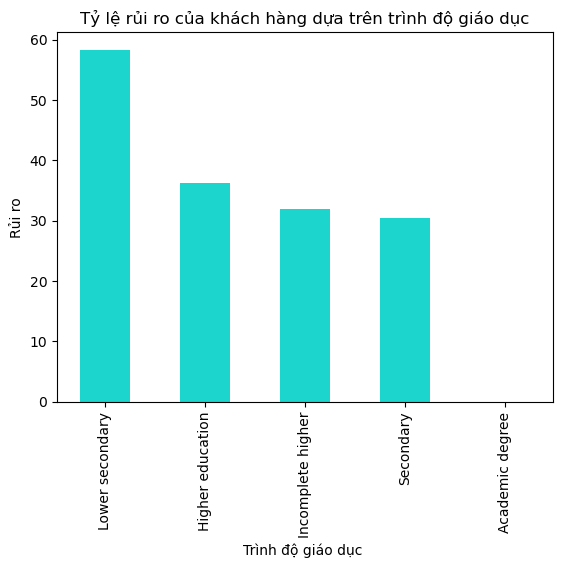

In [431]:
# Group the data
conversionsEdu = data.groupby('NAME_EDUCATION_TYPE').agg(TotalCount=('NAME_EDUCATION_TYPE', 'count'), NumberConversions=('TARGET', 'sum')).reset_index()
conversionsEdu['ConversionRate'] = conversionsEdu['NumberConversions'] / conversionsEdu['TotalCount'] * 100
conversionsEdu = conversionsEdu.sort_values('ConversionRate', ascending=False)

# Visualizing conversions by education
plt.bar(conversionsEdu['NAME_EDUCATION_TYPE'], conversionsEdu['ConversionRate'], width=0.5, color='#1CD6CE')
plt.title('Tỷ lệ rủi ro của khách hàng dựa trên trình độ giáo dục')
plt.xlabel('Trình độ giáo dục ')
plt.ylabel('Rủi ro')
plt.xticks(rotation=90)
plt.show()
#Lower secondary là nhóm có tỷ lệ rủi ro cao hơn mức trung bình. Bên cạnh đó, Academic degree gần như không có tỷ lệ xày ra rủi ro.
#Cho thấy trình độ học vấn có ảnh hưởng tới rủi ro.

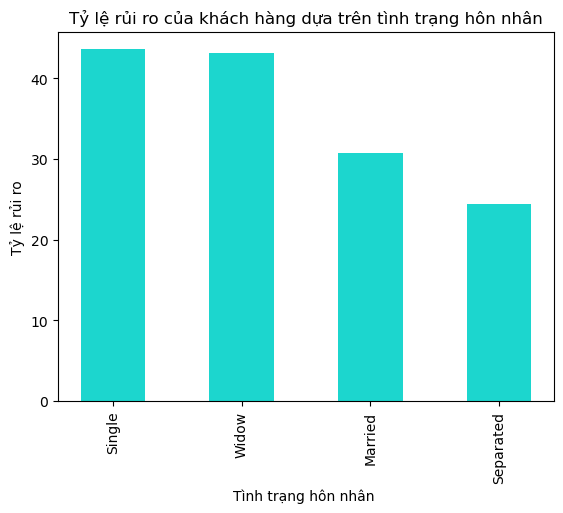

In [432]:
# Group the data
conversionsEdu = data.groupby('NAME_FAMILY_STATUS').agg(TotalCount=('NAME_FAMILY_STATUS', 'count'), NumberConversions=('TARGET', 'sum')).reset_index()
conversionsEdu['ConversionRate'] = conversionsEdu['NumberConversions'] / conversionsEdu['TotalCount'] * 100
conversionsEdu = conversionsEdu.sort_values('ConversionRate', ascending=False)

# Visualizing conversions
plt.bar(conversionsEdu['NAME_FAMILY_STATUS'], conversionsEdu['ConversionRate'], width=0.5, color='#1CD6CE')
plt.title('Tỷ lệ rủi ro của khách hàng dựa trên tình trạng hôn nhân')
plt.xlabel('Tình trạng hôn nhân ')
plt.ylabel('Tỷ lệ rủi ro')
plt.xticks(rotation=90)
plt.show()

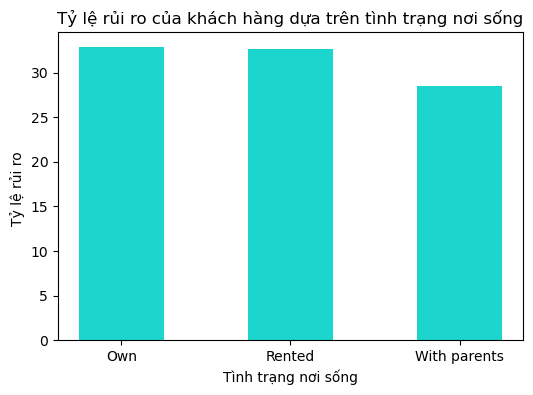

In [433]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data - housing loan
conversionsHousing = data.groupby('NAME_HOUSING_TYPE').agg(TotalCount=('NAME_HOUSING_TYPE', 'count'), NumberConversions=('TARGET', 'sum')).reset_index()
conversionsHousing['ConversionRate'] = conversionsHousing['NumberConversions'] / conversionsHousing['TotalCount'] * 100
conversionsHousing = conversionsHousing.sort_values('ConversionRate', ascending=False)

# Visualizing the data - housing loan
plt.figure(figsize=(6, 4))
plt.bar(conversionsHousing['NAME_HOUSING_TYPE'], conversionsHousing['ConversionRate'], width=0.5, color='#1CD6CE')
plt.xlabel('Tình trạng nơi sống')
plt.ylabel('Tỷ lệ rủi ro ')
plt.title('Tỷ lệ rủi ro của khách hàng dựa trên tình trạng nơi sống')
plt.show()
#Tình trạng nơi sống nhìn chung không ảnh hưởng đến tỷ lệ rủi ro
#Vì tỷ lệ dựa trên biểu đồ không quá chêch lệch

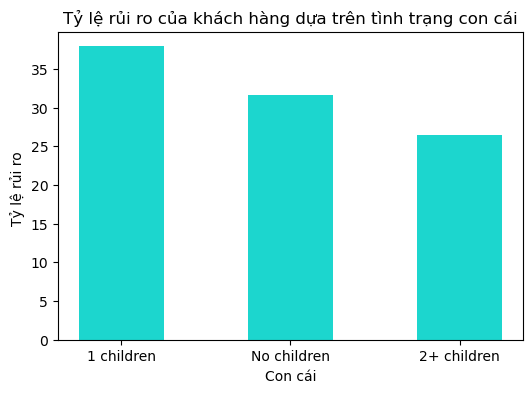

In [434]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data - personal loan
conversionsLoan = data.groupby('CNT_CHILDREN').agg(TotalCount=('CNT_CHILDREN', 'count'), NumberConversions=('TARGET', 'sum')).reset_index()
conversionsLoan['ConversionRate'] = conversionsLoan['NumberConversions'] / conversionsLoan['TotalCount'] * 100
conversionsLoan = conversionsLoan.sort_values('ConversionRate', ascending=False)

# Visualizing the data - personal loan
plt.figure(figsize=(6, 4))
plt.bar(conversionsLoan['CNT_CHILDREN'], conversionsLoan['ConversionRate'], width=0.5, color='#1CD6CE')
plt.xlabel('Con cái')
plt.ylabel('Tỷ lệ rủi ro ')
plt.title('Tỷ lệ rủi ro của khách hàng dựa trên tình trạng con cái')
plt.show()
#Những khách hàng có 1 đứa con có tỷ lệ rủi ro cao nhất nhưng không quá chênh lệch.

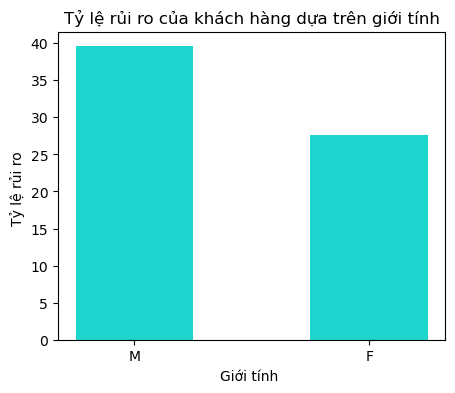

In [435]:
# Group the data
conversionsLoan = data.groupby('CODE_GENDER').agg(TotalCount=('CODE_GENDER', 'count'), NumberConversions=('TARGET', 'sum')).reset_index()
conversionsLoan['ConversionRate'] = conversionsLoan['NumberConversions'] / conversionsLoan['TotalCount'] * 100
conversionsLoan = conversionsLoan.sort_values('ConversionRate', ascending=False)

# Visualizing the data 
plt.figure(figsize=(5, 4))
plt.bar(conversionsLoan['CODE_GENDER'], conversionsLoan['ConversionRate'], width=0.5, color='#1CD6CE')
plt.xlabel('Giới tính ')
plt.ylabel('Tỷ lệ rủi ro ')
plt.title('Tỷ lệ rủi ro của khách hàng dựa trên giới tính')
plt.show()
#Tỷ lệ rủi ro ở khách hàng nam cao hơn khách hàng nữ

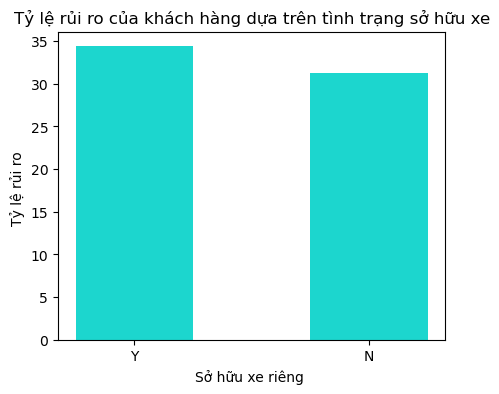

In [436]:
# Group the data
conversionsMonth = data.groupby('FLAG_OWN_CAR').agg(TotalCount=('FLAG_OWN_CAR', 'count'), NumberConversions=('TARGET', 'sum')).reset_index()
conversionsMonth['ConversionRate'] = conversionsMonth['NumberConversions'] / conversionsMonth['TotalCount'] * 100
conversionsMonth = conversionsMonth.sort_values('ConversionRate', ascending=False)

# Visualizing the data
plt.figure(figsize=(5, 4))
plt.bar(conversionsMonth['FLAG_OWN_CAR'], conversionsMonth['ConversionRate'], width=0.5, color='#1CD6CE')
plt.xlabel('Sở hữu xe riêng ')
plt.ylabel('Tỷ lệ rủi ro ')
plt.title('Tỷ lệ rủi ro của khách hàng dựa trên tình trạng sở hữu xe')
plt.show()
#Tỷ lệ rủi ro ở khách hàng sở hữu xe riêng cao hơn không có

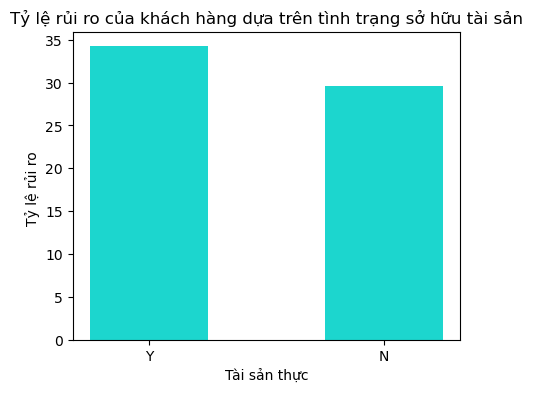

In [437]:
# Group the data
conversionsMonth = data.groupby('FLAG_OWN_REALTY').agg(TotalCount=('FLAG_OWN_REALTY', 'count'), NumberConversions=('TARGET', 'sum')).reset_index()
conversionsMonth['ConversionRate'] = conversionsMonth['NumberConversions'] / conversionsMonth['TotalCount'] * 100
conversionsMonth = conversionsMonth.sort_values('ConversionRate', ascending=False)


# Visualizing the data
plt.figure(figsize=(5, 4))
plt.bar(conversionsMonth['FLAG_OWN_REALTY'], conversionsMonth['ConversionRate'], width=0.5, color='#1CD6CE')
plt.xlabel('Tài sản thực')
plt.ylabel('Tỷ lệ rủi ro ')
plt.title('Tỷ lệ rủi ro của khách hàng dựa trên tình trạng sở hữu tài sản')
plt.show()
#Tỷ lệ rủi ro ở khách hàng sở hữu tài sản thực cao hơn không có

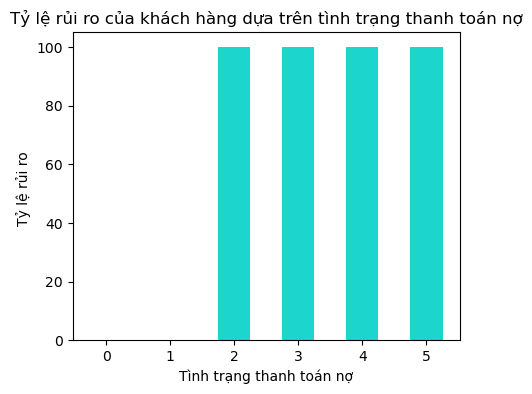

In [438]:
# Group the data
conversionsMonth = data.groupby('STATUS').agg(TotalCount=('STATUS', 'count'), NumberConversions=('TARGET', 'sum')).reset_index()
conversionsMonth['ConversionRate'] = conversionsMonth['NumberConversions'] / conversionsMonth['TotalCount'] * 100
conversionsMonth = conversionsMonth.sort_values('ConversionRate', ascending=False)


# Visualizing the data
plt.figure(figsize=(5, 4))
plt.bar(conversionsMonth['STATUS'], conversionsMonth['ConversionRate'], width=0.5, color='#1CD6CE')
plt.xlabel('Tình trạng thanh toán nợ')
plt.ylabel('Tỷ lệ rủi ro ')
plt.title('Tỷ lệ rủi ro của khách hàng dựa trên tình trạng thanh toán nợ')
plt.show()
#Khách hàng thuộc nhóm 2 tới 5 có tỷ lệ rủi ro gần như là 100%

In [439]:
#kiểm tra số biến object để Vectorise Features
{column: len(bank[column].unique()) for column in data.select_dtypes('object').columns}

{'CODE_GENDER': 2,
 'FLAG_OWN_CAR': 2,
 'FLAG_OWN_REALTY': 2,
 'CNT_CHILDREN': 3,
 'NAME_EDUCATION_TYPE': 5,
 'NAME_FAMILY_STATUS': 4,
 'NAME_HOUSING_TYPE': 3,
 'JOB': 18}

In [440]:
le= preprocessing.LabelEncoder()
objects = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','JOB']
for i in objects:  
    data[i] = le.fit_transform(data[i])

In [441]:
data.head()

,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,STATUS,TARGET,CUSTOMER_MONTHS,YEARS_BIRTH,YEARS_EMPLOYED,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,JOB
0,90000.0,1,0,0,0,2,1,38,45,1,0,0,1,2,4,0,0,8
1,112500.0,1,0,0,0,2,1,44,47,3,1,1,1,2,4,0,0,4
2,265500.0,1,0,0,0,2,1,9,30,6,0,1,1,0,1,0,2,0
3,202500.0,1,0,0,0,5,1,16,39,9,0,0,1,2,4,0,0,3
4,90000.0,1,1,1,0,5,1,35,51,2,0,1,1,2,4,0,0,2


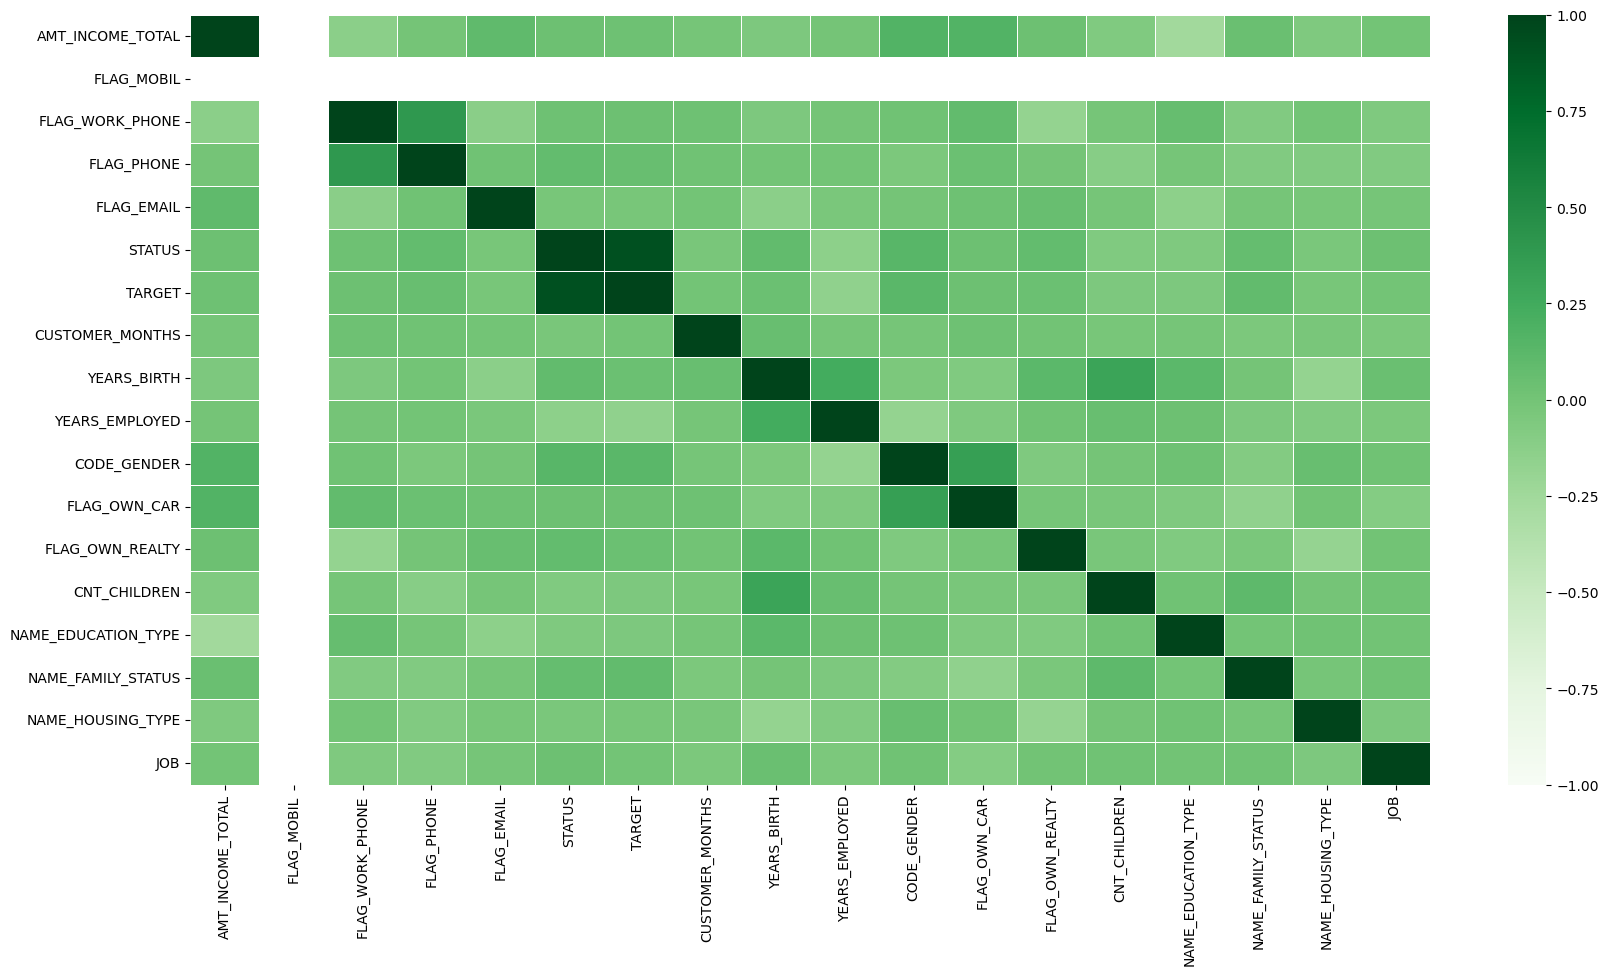

In [442]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Biểu đồ thể hiện ma trận tương quan giữa các biến - biểu đồ heatmap để xét độ tương quan
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap='Greens', linewidths=.5)
plt.show()
#Biến "FLAG_MOBIL" hoàn toàn không có sự tương quan với bất kì biến nào hay cả rủi ro.

In [443]:
#Sau khi xem xét ma trận tương quan giữa các biến
#loại bỏ đi cột "STATUS" do có sự tương quan quá lớn với biến "TARGET" làm xảy ra hiện tượng đa cộng tuyến
del data['STATUS']

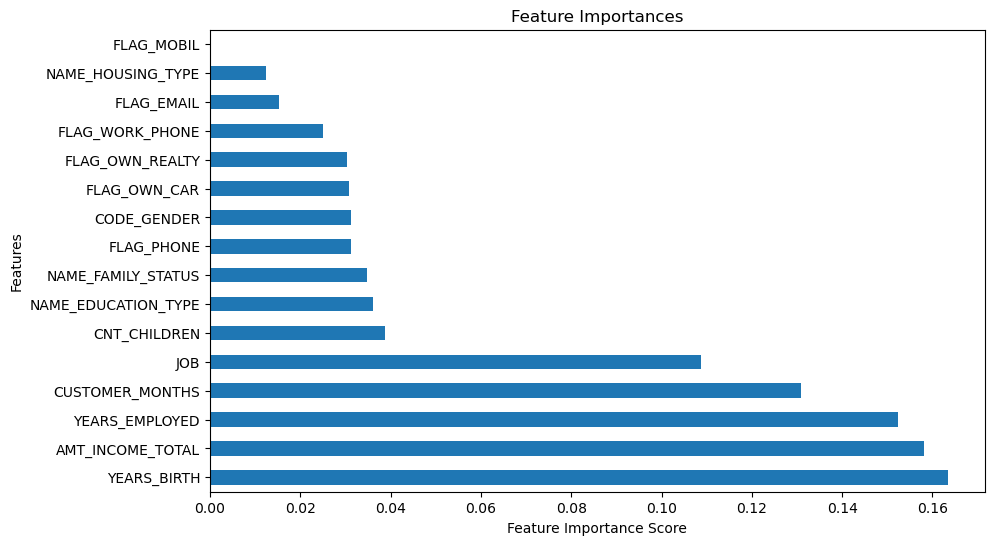

In [444]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Xác định đặc trưng (features) và biến mục tiêu (y)
X = data.drop('TARGET', axis=1)
y = data['TARGET']

# Huấn luyện mô hình RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

# Tạo Series chứa đặc trưng quan trọng
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

# Vẽ biểu đồ thanh ngang của tất cả đặc trưng quan trọng
plt.figure(figsize=(10, 6))  # Kích thước biểu đồ
feat_importances.sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

In [445]:
#drop đi những biến không quan trọng
feature = data.columns.tolist()
del feature[19:]
feature.remove('FLAG_MOBIL')
feature.remove('FLAG_EMAIL')
feature.remove('NAME_HOUSING_TYPE')
feature.remove('FLAG_WORK_PHONE')
feature.remove('FLAG_PHONE')
feature

['AMT_INCOME_TOTAL',
 'TARGET',
 'CUSTOMER_MONTHS',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'JOB']

In [446]:
# Split Data into Train and Test
x = data[feature].drop("TARGET", axis = 1)
y = data['TARGET']

In [447]:
x

,AMT_INCOME_TOTAL,CUSTOMER_MONTHS,YEARS_BIRTH,YEARS_EMPLOYED,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,JOB
0,90000.0,38,45,1,0,0,1,2,4,0,8
1,112500.0,44,47,3,1,1,1,2,4,0,4
2,265500.0,9,30,6,0,1,1,0,1,0,0
3,202500.0,16,39,9,0,0,1,2,4,0,3
4,90000.0,35,51,2,0,1,1,2,4,0,2
...,...,...,...,...,...,...,...,...,...,...,...
5995,270000.0,16,50,27,0,0,1,0,1,0,3
5996,121500.0,24,54,33,0,0,1,2,4,3,8
5997,225000.0,13,48,5,1,0,0,0,4,0,4
5998,247500.0,25,38,4,1,1,0,2,4,0,4


In [448]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    0
5997    0
5998    0
5999    0
Name: TARGET, Length: 6000, dtype: int64

In [449]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [450]:
y>0.9
print(y.value_counts())

TARGET
0    4042
1    1958
Name: count, dtype: int64


In [451]:
#Cân bằng Target
from imblearn.over_sampling import SMOTE
# Khởi tạo SMOTE
smote = SMOTE(random_state=42)
# Cân bằng lớp của x và y
x_balanced, y_balanced = smote.fit_resample(x, y)
y = y_balanced
x = x_balanced

In [452]:
import pandas as pd
# Hiển thị số lượng các lớp sau khi cân bằng
class_counts = pd.Series(y_balanced).value_counts()
print("Số lượng lớp 0 sau khi cân bằng:", class_counts[0])
print("Số lượng lớp 1 sau khi cân bằng:", class_counts[1])

Số lượng lớp 0 sau khi cân bằng: 4042
Số lượng lớp 1 sau khi cân bằng: 4042


In [453]:
!pip install -U imbalanced-learn

In [454]:
from imblearn import over_sampling
x_train_smote, y_train_smote = over_sampling.SMOTE(random_state=3).fit_resample(x_train, y_train)

In [455]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.model_selection import cross_validate
def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)
    
    print("Accuracy: ", round(accuracy_score(y_test, y_pred),3))
    print("Precision:",round(precision_score(y_test, y_pred),3))
    print("Recall: ",round(recall_score(y_test, y_pred),3))
    print("F1-Score: ",round(f1_score(y_test, y_pred),3))  
    print("Kappa Score:", round(cohen_kappa_score(y_test, y_pred),3))
    score = cross_validate(model, x, y, cv=5, scoring='roc_auc', return_train_score=True)

In [456]:
# DecisionTree algorithm
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=3)
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)
eval_classification(model1)

Accuracy:  0.897
Precision: 0.809
Recall:  0.901
F1-Score:  0.852
Kappa Score: 0.773


In [457]:
# GradientBoosting algorithm
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier(random_state=3)
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
eval_classification(model2)

Accuracy:  0.791
Precision: 0.807
Recall:  0.485
F1-Score:  0.606
Kappa Score: 0.476


In [458]:
#  RandomForest algorithm
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(random_state=3)
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)
eval_classification(model3)

Accuracy:  0.942
Precision: 0.913
Recall:  0.911
F1-Score:  0.912
Kappa Score: 0.868


In [459]:
# KNN algorithm 
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier()
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)
eval_classification(model4)

Accuracy:  0.839
Precision: 0.721
Recall:  0.841
F1-Score:  0.776
Kappa Score: 0.652


In [460]:
# SVC algorithm
from sklearn.svm import SVC
model5 = SVC(probability=True, random_state=3)
model5.fit(x_train, y_train)
y_pred = model5.predict(x_test)
eval_classification(model5)

Accuracy:  0.672
Precision: 0.619
Recall:  0.022
F1-Score:  0.042
Kappa Score: 0.02


In [461]:
# AdaBoost algorithm
from sklearn.ensemble import AdaBoostClassifier
model6 = AdaBoostClassifier(random_state=3)
model6.fit(x_train, y_train)
y_pred = model6.predict(x_test)
eval_classification(model6)

Accuracy:  0.724
Precision: 0.635
Recall:  0.391
F1-Score:  0.484
Kappa Score: 0.31


In [462]:
# Naive_bayes algorithm
from sklearn.naive_bayes import GaussianNB
model7 = GaussianNB()
model7.fit(x_train, y_train)
y_pred = model7.predict(x_test)
eval_classification(model7)

Accuracy:  0.671
Precision: 0.515
Recall:  0.089
F1-Score:  0.152
Kappa Score: 0.06


In [463]:
!pip install xgboost

In [464]:
# xgboost algorithm
from xgboost import XGBClassifier
model8 = XGBClassifier()
model8.fit(x_train, y_train)
y_pred = model8.predict(x_test)
eval_classification(model8)

Accuracy:  0.916
Precision: 0.873
Recall:  0.874
F1-Score:  0.873
Kappa Score: 0.811


In [465]:
!pip install lightgbm

In [466]:
# lightgbm algorithm
from lightgbm import LGBMClassifier
model9 = LGBMClassifier()
model9.fit(x_train, y_train)
y_pred = model9.predict(x_test)
eval_classification(model9)

[LightGBM] [Info] Number of positive: 1362, number of negative: 2838
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001884 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 257
[LightGBM] [Info] Number of data points in the train set: 4200, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.324286 -> initscore=-0.734145
[LightGBM] [Info] Start training from score -0.734145
Accuracy:  0.911
Precision: 0.887
Recall:  0.839
F1-Score:  0.862
Kappa Score: 0.797
[LightGBM] [Info] Number of positive: 3233, number of negative: 3234
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 272
[LightGBM] [Info] Number of data points in the train set: 6467, number of used features: 11
[Ligh

In [467]:
# ExtraTrees algorithm
from sklearn.ensemble import ExtraTreesClassifier
model10 = ExtraTreesClassifier()
model10.fit(x_train, y_train)
y_pred = model10.predict(x_test)
eval_classification(model10)

Accuracy:  0.94
Precision: 0.907
Recall:  0.913
F1-Score:  0.91
Kappa Score: 0.865


In [468]:
# Bagging algorithm
from sklearn.ensemble import BaggingClassifier
model11 = BaggingClassifier()
model11.fit(x_train, y_train)
y_pred = model11.predict(x_test)
eval_classification(model11)

Accuracy:  0.919
Precision: 0.879
Recall:  0.878
F1-Score:  0.878
Kappa Score: 0.818


In [469]:
# QuadraticDiscriminant algorithm
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model12 = QuadraticDiscriminantAnalysis()
model12.fit(x_train, y_train)
y_pred = model12.predict(x_test)
eval_classification(model12)

Accuracy:  0.691
Precision: 0.551
Recall:  0.351
F1-Score:  0.429
Kappa Score: 0.231


In [470]:
# LinearDiscriminant algorithm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model13 = LinearDiscriminantAnalysis()
model13.fit(x_train, y_train)
y_pred = model13.predict(x_test)
eval_classification(model13)

Accuracy:  0.701
Precision: 0.659
Recall:  0.201
F1-Score:  0.308
Kappa Score: 0.182


In [471]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

# Tạo danh sách các mô hình và tên tương ứng
models = [
    {'model': model1, 'name': 'Decision Tree'},
    {'model': model2, 'name': 'Gradient Boosting'},
    {'model': model3, 'name': 'Random Forest'},
    {'model': model4, 'name': 'KNN'},
    {'model': model5, 'name': 'SVC'},
    {'model': model6, 'name': 'Ada Boost'},
    {'model': model7, 'name': 'Naive Bayes'},
    {'model': model8, 'name': 'XGB'},
    {'model': model9, 'name': 'LightGBM'},
    {'model': model10, 'name': 'Extra Tree'},
    {'model': model11, 'name': 'Bagging'},
    {'model': model12, 'name': 'Quadratic Discriminant'},
    {'model': model13, 'name': 'Linear Discriminant'}
]

# Tạo danh sách dictionaries để lưu kết quả đánh giá
results = []

# Duyệt qua danh sách các mô hình và tính toán kết quả đánh giá
for m in models:
    model = m['model']
    name = m['name']
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy':accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'Kappa': kappa})

# Tạo DataFrame từ danh sách dictionaries và sắp xếp theo F1-Score giảm dần
dt= pd.DataFrame(results)
dt_sorted = dt.sort_values(by='F1-Score', ascending=False)

# In DataFrame đã sắp xếp
print(dt_sorted)


                     Model  Accuracy  Precision    Recall  F1-Score     Kappa
2            Random Forest  0.941667   0.912605  0.911074  0.911839  0.868252
9               Extra Tree  0.940000   0.906667  0.912752  0.909699  0.864775
10                 Bagging  0.919444   0.878992  0.877517  0.878254  0.818063
7                      XGB  0.916111   0.872697  0.874161  0.873428  0.810695
8                 LightGBM  0.911111   0.886525  0.838926  0.862069  0.796569
0            Decision Tree  0.896667   0.808735  0.901007  0.852381  0.773249
3                      KNN  0.839444   0.720863  0.840604  0.776143  0.652124
1        Gradient Boosting  0.791111   0.807263  0.484899  0.605870  0.475537
5                Ada Boost  0.723889   0.634877  0.390940  0.483904  0.309688
11  Quadratic Discriminant  0.690556   0.551451  0.350671  0.428718  0.230682
12     Linear Discriminant  0.701111   0.659341  0.201342  0.308483  0.181719
6              Naive Bayes  0.670556   0.514563  0.088926  0.151

In [472]:
from sklearn.metrics import classification_report

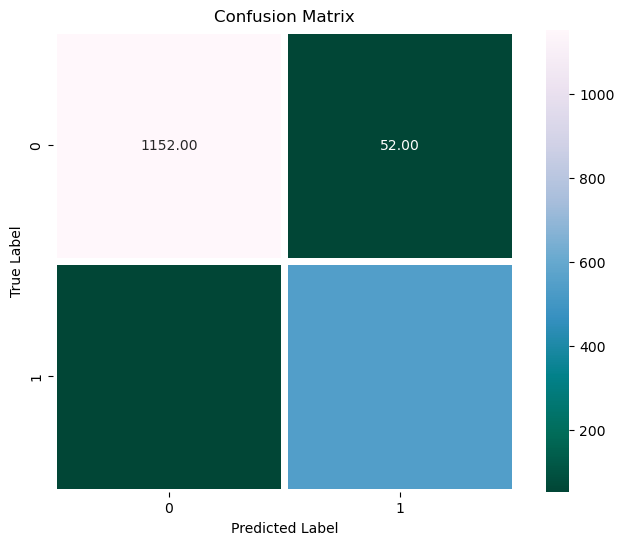

In [473]:
# Dự đoán nhãn lớp cho dữ liệu kiểm tra
y_pred1 = model3.predict(x_test)

# Tính ma trận nhầm lẫn
matrix = confusion_matrix(y_test, y_pred1)

# Vẽ biểu đồ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt=".2f", linewidths=5, square=True, cmap="PuBuGn_r")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [474]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1204
           1       0.91      0.91      0.91       596

    accuracy                           0.94      1800
   macro avg       0.93      0.93      0.93      1800
weighted avg       0.94      0.94      0.94      1800



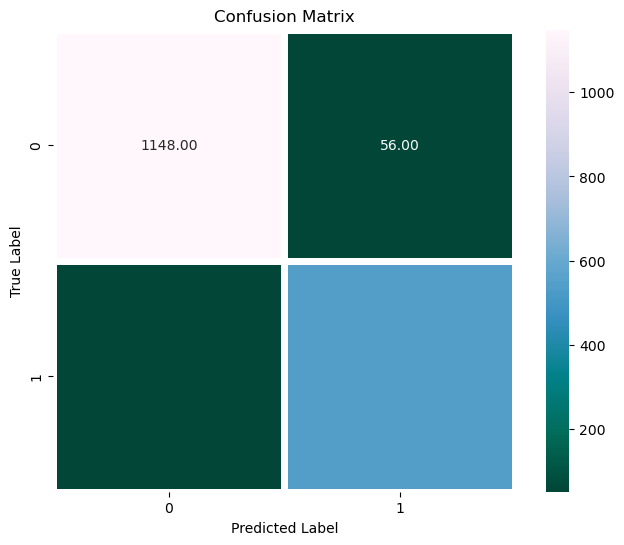

In [475]:
# Dự đoán nhãn lớp cho dữ liệu kiểm tra
y_pred2 = model10.predict(x_test)

# Tính ma trận nhầm lẫn
matrix = confusion_matrix(y_test, y_pred2)

# Vẽ biểu đồ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt=".2f", linewidths=5, square=True, cmap="PuBuGn_r")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [476]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1204
           1       0.91      0.91      0.91       596

    accuracy                           0.94      1800
   macro avg       0.93      0.93      0.93      1800
weighted avg       0.94      0.94      0.94      1800



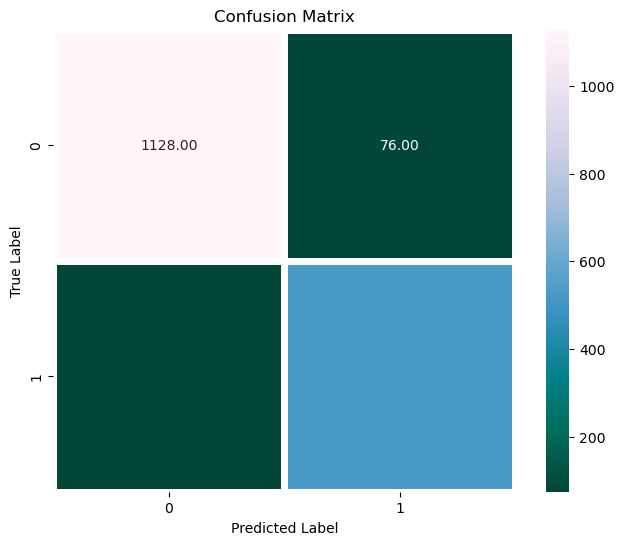

In [477]:
# Dự đoán nhãn lớp cho dữ liệu kiểm tra
y_pred3 = model8.predict(x_test)

# Tính ma trận nhầm lẫn
matrix = confusion_matrix(y_test, y_pred3)

# Vẽ biểu đồ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt=".2f", linewidths=5, square=True, cmap="PuBuGn_r")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [478]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1204
           1       0.87      0.87      0.87       596

    accuracy                           0.92      1800
   macro avg       0.91      0.91      0.91      1800
weighted avg       0.92      0.92      0.92      1800



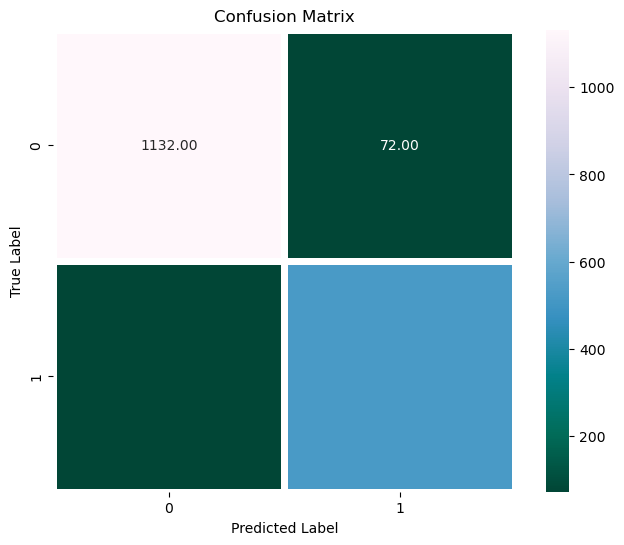

In [479]:
# Dự đoán nhãn lớp cho dữ liệu kiểm tra
y_pred4 = model11.predict(x_test)

# Tính ma trận nhầm lẫn
matrix = confusion_matrix(y_test, y_pred4)

# Vẽ biểu đồ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt=".2f", linewidths=5, square=True, cmap="PuBuGn_r")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [480]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1204
           1       0.88      0.88      0.88       596

    accuracy                           0.92      1800
   macro avg       0.91      0.91      0.91      1800
weighted avg       0.92      0.92      0.92      1800



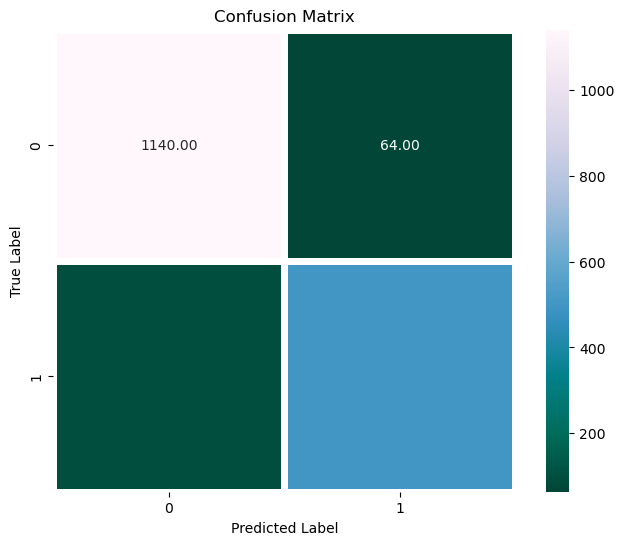

In [481]:
# Dự đoán nhãn lớp cho dữ liệu kiểm tra
y_pred5 = model9.predict(x_test)

# Tính ma trận nhầm lẫn
matrix = confusion_matrix(y_test, y_pred5)

# Vẽ biểu đồ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt=".2f", linewidths=5, square=True, cmap="PuBuGn_r")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [482]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1204
           1       0.89      0.84      0.86       596

    accuracy                           0.91      1800
   macro avg       0.90      0.89      0.90      1800
weighted avg       0.91      0.91      0.91      1800



In [483]:
#Trainig the model with
model3.fit(x_train_smote, y_train_smote)
    
# Predict the model with test data

y_pred = model3.predict(x_test)
out=pd.DataFrame({'y_actual':y_test,'y_pred':y_pred})
result=data.merge(out,left_index=True,right_index=True)
result

,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,TARGET,CUSTOMER_MONTHS,YEARS_BIRTH,YEARS_EMPLOYED,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,JOB,y_actual,y_pred
0,90000.0,1,0,0,0,1,38,45,1,0,0,1,2,4,0,0,8,1,1
6,135000.0,1,0,0,0,1,34,54,1,0,0,0,2,4,3,0,3,1,1
8,90000.0,1,1,1,0,1,10,51,2,0,1,1,2,4,0,0,2,1,1
9,315000.0,1,0,0,0,1,27,51,3,1,1,1,2,1,0,0,10,1,1
15,135000.0,1,0,0,0,1,0,29,6,0,0,0,2,1,2,0,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5978,225000.0,1,1,0,0,0,15,42,0,1,0,0,2,4,0,0,8,0,0
5990,180000.0,1,0,1,0,0,14,46,15,1,0,1,2,2,0,0,8,0,0
5991,270000.0,1,0,0,0,0,50,31,11,1,0,1,1,4,2,0,8,0,0
5993,360000.0,1,0,1,0,0,38,36,2,1,1,1,1,4,0,0,10,0,0


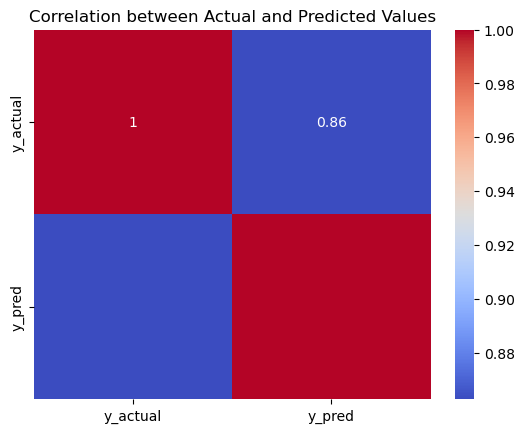

In [484]:
#Sử dụng biểu đồ heatmap với ma trận tương quan.
import seaborn as sns
import matplotlib.pyplot as plt

# Tính ma trận tương quan giữa 2 biến
corr_matrix = result[["y_actual", "y_pred"]].corr()

# Vẽ biểu đồ heatmap với ma trận tương quan
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation between Actual and Predicted Values")
plt.show()

In [485]:
from sklearn.metrics import cohen_kappa_score

#có tập dữ liệu dự đoán từ mô hình (y_pred) và tập dữ liệu thực tế (y_true)
y_pred = model3.predict(x_test)
y_true = y_test

# Tính toán Cohen's Kappa
kappa = cohen_kappa_score(y_true, y_pred)

# In kết quả
print("Cohen's Kappa:", kappa)

Cohen's Kappa: 0.8626190634783188
